In [92]:
# Initialize Otter
import otter
grader = otter.Notebook("lab02B.ipynb")

## Lab 02B: Data Cleaning and EDA

To receive credit for a lab, answer all questions correctly and submit before the deadline.

You must submit this assignment to Gradescope by the on-time deadline, Tuesday, February 11th, 11:59 PM PT. Please read the syllabus for the Slip Day policy. As a reminder, slip days are **not** applicable on labs. **We strongly encourage you to plan to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to contact staff for submission support. 

### Lab Walk-Through
In addition to the lab notebook, we have also released a prerecorded walk-through video of the lab. We encourage you to reference this video as you work through the lab. Run the cell below to display the videos.
<br>
**Note:** This video is recorded in Fall 2023. There may be slight inconsistencies between the version you are viewing vesus the version used in the recording, but content is identical.

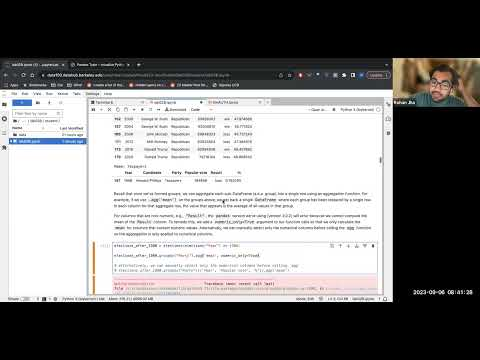

In [93]:
from IPython.display import YouTubeVideo
YouTubeVideo("hwRYs5ZRgW4", list = 'PLQCcNQgUcDfqSg049DVFZCQbupMY5Bn5Z', listType = 'playlist')

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** below. (That's a good way to learn your classmates' names.)

**Collaborators**: *list collaborators here*

### Discussion 3 Mini-lecture

In Data 100, discussions will not reserve time to host mini-lectures. Instead, we will release a set of pre-recorded mini-lectures that supplement the concepts introduced in lecture. The week after a mini-lecture is released, the topics will be covered in discussion. Thus, it is important to watch these mini-lectures **before** attending the discussion section you are assigned to. Discussion 3 mini-lecture is attached below. **Make sure you are signed into your berkeley.edu account on YouTube for it to properly render below.**

In [94]:
YouTubeVideo("9jFqjbPLThc", list = 'PLQCcNQgUcDfoUXRtrHc9TUx2pBYNfToVN', listType='playlist')

---
### Debugging Guide
If you run into any technical issues, we highly recommend checking out the [Data 100 Debugging Guide](https://ds100.org/debugging-guide/). In this guide, you can find general questions about Jupyter notebooks / Datahub, Gradescope, and common pandas errors.

---
[`pandas`](https://pandas.pydata.org/) is one of the most widely used `Python` libraries in data science. In this lab, you will review commonly used data-wrangling operations/tools in `pandas`. We continue the content from the previous lab and aim to give you familiarity with:

* Aggregating the data (using `.groupby`),
* Filtering the data (using boolean arrays and `groupby.filter`),
* Pivoting (using `.pivot_table`).

In this lab, you are going to use several `pandas` methods. Reminder from the lecture that you may press `shift+tab` on method parameters to see the documentation for that method. For example, if you were using the `drop` method in `pandas`, you could press `shift+tab` to see what `drop` is expecting.

`pandas` is very similar to the `datascience` library that you saw in Data 8. This [conversion notebook](https://data100.datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FDS-100%2Fsu23-materials&branch=main&urlpath=lab%2Ftree%2Fsu23-materials%2Flec%2Flec02%2Fdata8_translation_examples.ipynb) may serve as a useful guide!

This lab expects that you have watched all three `pandas` lectures. If you have not, this lab will probably take a very long time.

In [95]:
import numpy as np
import pandas as pd
%matplotlib inline

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### **REVIEW:** `Groupby` and `Groupby` Shorthand

Let's now turn to use `groupby` from lectures 3 and 4.

### Elections

Let's start by reading in the election dataset from the `pandas` lectures.

In [96]:
# Run this cell to load data from CSV file; no further action is needed.
elections = pd.read_csv("data/elections.csv")
elections.head(5)

Year          Candidate                  Party  Popular vote Result  \
0  1824     Andrew Jackson  Democratic-Republican        151271   loss   
1  1824  John Quincy Adams  Democratic-Republican        113142    win   
2  1828     Andrew Jackson             Democratic        642806    win   
3  1828  John Quincy Adams    National Republican        500897   loss   
4  1832     Andrew Jackson             Democratic        702735    win   

           %  
0  57.210122  
1  42.789878  
2  56.203927  
3  43.796073  
4  54.574789

As we saw before, we can `groupby` a specific column, e.g., `"Party"` and can print out the resulting sub-DataFrames. The output below can help you get an understanding of what `groupby` is actually doing.

An example is given below for elections since 1980.

In [97]:
# Run this cell to print sub-DataFrames of a groupby object; no further action is needed.
for n, g in elections[elections["Year"] >= 1980].groupby("Party"):
    print(f"Name: {n}") # By the way, this is an "f string", a relatively new and great feature of Python
    display(g)

Name: Citizens


Year       Candidate     Party  Popular vote Result         %
127  1980  Barry Commoner  Citizens        233052   loss  0.270182

Name: Constitution


Year         Candidate         Party  Popular vote Result         %
160  2004  Michael Peroutka  Constitution        143630   loss  0.117542
164  2008     Chuck Baldwin  Constitution        199750   loss  0.152398
172  2016    Darrell Castle  Constitution        203091   loss  0.149640

Name: Democratic


Year        Candidate       Party  Popular vote Result          %
129  1980     Jimmy Carter  Democratic      35480115   loss  41.132848
134  1984   Walter Mondale  Democratic      37577352   loss  40.729429
137  1988  Michael Dukakis  Democratic      41809074   loss  45.770691
140  1992     Bill Clinton  Democratic      44909806    win  43.118485
144  1996     Bill Clinton  Democratic      47400125    win  49.296938
151  2000          Al Gore  Democratic      50999897   loss  48.491813
158  2004       John Kerry  Democratic      59028444   loss  48.306775
162  2008     Barack Obama  Democratic      69498516    win  53.023510
168  2012     Barack Obama  Democratic      65915795    win  51.258484
176  2016  Hillary Clinton  Democratic      65853514   loss  48.521539
178  2020     Joseph Biden  Democratic      81268924    win  51.311515
183  2024    Kamala Harris  Democratic      75019230   loss  48.336772

Name: Green


Year         Candidate  Party  Popular vote Result         %
149  1996       Ralph Nader  Green        685297   loss  0.712721
155  2000       Ralph Nader  Green       2882955   loss  2.741176
156  2004        David Cobb  Green        119859   loss  0.098088
165  2008  Cynthia McKinney  Green        161797   loss  0.123442
170  2012        Jill Stein  Green        469627   loss  0.365199
177  2016        Jill Stein  Green       1457226   loss  1.073699
181  2020    Howard Hawkins  Green        405035   loss  0.255731
184  2024        Jill Stein  Green        861155   loss  0.554864

Name: Independent


Year         Candidate        Party  Popular vote Result          %
130  1980  John B. Anderson  Independent       5719850   loss   6.631143
143  1992        Ross Perot  Independent      19743821   loss  18.956298
161  2004       Ralph Nader  Independent        465151   loss   0.380663
167  2008       Ralph Nader  Independent        739034   loss   0.563842
174  2016     Evan McMullin  Independent        732273   loss   0.539546
185  2024    Robert Kennedy  Independent        756383   loss   0.487357

Name: Libertarian


Year         Candidate        Party  Popular vote Result         %
128  1980          Ed Clark  Libertarian        921128   loss  1.067883
132  1984    David Bergland  Libertarian        228111   loss  0.247245
138  1988          Ron Paul  Libertarian        431750   loss  0.472660
139  1992      Andre Marrou  Libertarian        290087   loss  0.278516
146  1996      Harry Browne  Libertarian        485759   loss  0.505198
153  2000      Harry Browne  Libertarian        384431   loss  0.365525
159  2004  Michael Badnarik  Libertarian        397265   loss  0.325108
163  2008          Bob Barr  Libertarian        523715   loss  0.399565
169  2012      Gary Johnson  Libertarian       1275971   loss  0.992241
175  2016      Gary Johnson  Libertarian       4489235   loss  3.307714
180  2020      Jo Jorgensen  Libertarian       1865724   loss  1.177979

Name: Libertarian Party


Year     Candidate              Party  Popular vote Result         %
186  2024  Chase Oliver  Libertarian Party        650130   loss  0.418895

Name: Natural Law


Year     Candidate        Party  Popular vote Result         %
148  1996  John Hagelin  Natural Law        113670   loss  0.118219

Name: New Alliance


Year      Candidate         Party  Popular vote Result         %
136  1988  Lenora Fulani  New Alliance        217221   loss  0.237804

Name: Populist


Year Candidate     Party  Popular vote Result         %
141  1992  Bo Gritz  Populist        106152   loss  0.101918

Name: Reform


Year     Candidate   Party  Popular vote Result         %
150  1996    Ross Perot  Reform       8085294   loss  8.408844
154  2000  Pat Buchanan  Reform        448895   loss  0.426819

Name: Republican


Year          Candidate       Party  Popular vote Result          %
131  1980      Ronald Reagan  Republican      43903230    win  50.897944
133  1984      Ronald Reagan  Republican      54455472    win  59.023326
135  1988  George H. W. Bush  Republican      48886597    win  53.518845
142  1992  George H. W. Bush  Republican      39104550   loss  37.544784
145  1996           Bob Dole  Republican      39197469   loss  40.766036
152  2000     George W. Bush  Republican      50456002    win  47.974666
157  2004     George W. Bush  Republican      62040610    win  50.771824
166  2008        John McCain  Republican      59948323   loss  45.737243
171  2012        Mitt Romney  Republican      60933504   loss  47.384076
173  2016       Donald Trump  Republican      62984828    win  46.407862
179  2020       Donald Trump  Republican      74216154   loss  46.858542
182  2024       Donald Trump  Republican      77303568    win  49.808629

Name: Taxpayers


Year        Candidate      Party  Popular vote Result         %
147  1996  Howard Phillips  Taxpayers        184656   loss  0.192045

Recall that once we've formed groups, we can aggregate each sub-DataFrame (a.k.a. group) into a single row using an aggregation function. For example, if we use `.agg('mean')` on the groups above, we get back a single `DataFrame` where each group has been replaced by a single row. In each column for that aggregate row, the value that appears is the average of all values in that group.

For columns that are non-numeric, e.g., `"Result"`, the `pandas` version we're using (version 2.0.2) will error because we cannot compute the mean of the `Result` column. To remedy this, we add a `numeric_only=True` argument to our function calls so that we only calculate the `mean` for columns that contain numeric values. Alternatively, we can manually select only the numerical columns before calling the `agg` function so the aggregation is only applied to numerical columns.

In [98]:
elections_after_1980 = elections[elections["Year"] >= 1980]

elections_after_1980.groupby("Party").agg('mean', numeric_only=True)

# alternatively, we can manually select only the numerical columns before calling `agg`
# elections_after_1980.groupby("Party")[['Year', 'Popular vote', '%']].agg('mean')

Year  Popular vote          %
Party                                                  
Citizens           1980.000000  2.330520e+05   0.270182
Constitution       2009.333333  1.821570e+05   0.139860
Democratic         2002.000000  5.623007e+07  47.441567
Green              2010.000000  8.803689e+05   0.740615
Independent        2004.000000  4.692752e+06   4.593141
Libertarian        2000.000000  1.026652e+06   0.830876
Libertarian Party  2024.000000  6.501300e+05   0.418895
Natural Law        1996.000000  1.136700e+05   0.118219
New Alliance       1988.000000  2.172210e+05   0.237804
Populist           1992.000000  1.061520e+05   0.101918
Reform             1998.000000  4.267094e+06   4.417831
Republican         2002.000000  5.611919e+07  48.057815
Taxpayers          1996.000000  1.846560e+05   0.192045

Equivalently we can use one of the shorthand aggregation functions, e.g. `.mean()`: 

In [99]:
elections_after_1980.groupby("Party").mean(numeric_only=True)

Year  Popular vote          %
Party                                                  
Citizens           1980.000000  2.330520e+05   0.270182
Constitution       2009.333333  1.821570e+05   0.139860
Democratic         2002.000000  5.623007e+07  47.441567
Green              2010.000000  8.803689e+05   0.740615
Independent        2004.000000  4.692752e+06   4.593141
Libertarian        2000.000000  1.026652e+06   0.830876
Libertarian Party  2024.000000  6.501300e+05   0.418895
Natural Law        1996.000000  1.136700e+05   0.118219
New Alliance       1988.000000  2.172210e+05   0.237804
Populist           1992.000000  1.061520e+05   0.101918
Reform             1998.000000  4.267094e+06   4.417831
Republican         2002.000000  5.611919e+07  48.057815
Taxpayers          1996.000000  1.846560e+05   0.192045

Note that the index of the `DataFrame` returned by a `groupby.agg` call is no longer a set of numeric indices from $0$ to $N-1$. Instead, we see that the index for the example above is now the `Party`. If we want to restore our `DataFrame` so that `Party` is a column rather than the index, we can use `reset_index`.

In [100]:
elections_after_1980.groupby("Party").mean(numeric_only=True).reset_index()

Party         Year  Popular vote          %
0            Citizens  1980.000000  2.330520e+05   0.270182
1        Constitution  2009.333333  1.821570e+05   0.139860
2          Democratic  2002.000000  5.623007e+07  47.441567
3               Green  2010.000000  8.803689e+05   0.740615
4         Independent  2004.000000  4.692752e+06   4.593141
5         Libertarian  2000.000000  1.026652e+06   0.830876
6   Libertarian Party  2024.000000  6.501300e+05   0.418895
7         Natural Law  1996.000000  1.136700e+05   0.118219
8        New Alliance  1988.000000  2.172210e+05   0.237804
9            Populist  1992.000000  1.061520e+05   0.101918
10             Reform  1998.000000  4.267094e+06   4.417831
11         Republican  2002.000000  5.611919e+07  48.057815
12          Taxpayers  1996.000000  1.846560e+05   0.192045

**IMPORTANT NOTE:** Notice that the code above consists of chained method calls. This sort of code is very common in `pandas` programming and in data science in general. Such chained method calls can sometimes go many layers deep, so you might consider adding newlines between lines of code for clarity. For example, we could instead write the code above as:

In [101]:
# pandas method chaining
(
elections.query("Year >= 1980").groupby("Party") 
                               .mean(numeric_only=True)  ## Computes the mean values by party
                               .reset_index()            ## Resets to a numerical index
)

Party         Year  Popular vote          %
0            Citizens  1980.000000  2.330520e+05   0.270182
1        Constitution  2009.333333  1.821570e+05   0.139860
2          Democratic  2002.000000  5.623007e+07  47.441567
3               Green  2010.000000  8.803689e+05   0.740615
4         Independent  2004.000000  4.692752e+06   4.593141
5         Libertarian  2000.000000  1.026652e+06   0.830876
6   Libertarian Party  2024.000000  6.501300e+05   0.418895
7         Natural Law  1996.000000  1.136700e+05   0.118219
8        New Alliance  1988.000000  2.172210e+05   0.237804
9            Populist  1992.000000  1.061520e+05   0.101918
10             Reform  1998.000000  4.267094e+06   4.417831
11         Republican  2002.000000  5.611919e+07  48.057815
12          Taxpayers  1996.000000  1.846560e+05   0.192045

Note that we have surrounded the entire call by a big set of parentheses so that `Python` doesn't complain about the indentation. An alternative is to use the \ symbol to indicate to `Python` that your code continues on to the next line!

In [102]:
# pandas method chaining (alternative)
elections[elections["Year"] >= 1980].groupby("Party") \
                               .mean(numeric_only=True) \
                               .reset_index()     

Party         Year  Popular vote          %
0            Citizens  1980.000000  2.330520e+05   0.270182
1        Constitution  2009.333333  1.821570e+05   0.139860
2          Democratic  2002.000000  5.623007e+07  47.441567
3               Green  2010.000000  8.803689e+05   0.740615
4         Independent  2004.000000  4.692752e+06   4.593141
5         Libertarian  2000.000000  1.026652e+06   0.830876
6   Libertarian Party  2024.000000  6.501300e+05   0.418895
7         Natural Law  1996.000000  1.136700e+05   0.118219
8        New Alliance  1988.000000  2.172210e+05   0.237804
9            Populist  1992.000000  1.061520e+05   0.101918
10             Reform  1998.000000  4.267094e+06   4.417831
11         Republican  2002.000000  5.611919e+07  48.057815
12          Taxpayers  1996.000000  1.846560e+05   0.192045

**IMPORTANT NOTE:** You should NEVER solve problems like the one above using loops or list comprehensions. This is slow and also misses the entire point of this part of Data 100. 

Before we continue, we'll print out the election dataset again for your convenience. 

In [103]:
elections.head(5)

Year          Candidate                  Party  Popular vote Result  \
0  1824     Andrew Jackson  Democratic-Republican        151271   loss   
1  1824  John Quincy Adams  Democratic-Republican        113142    win   
2  1828     Andrew Jackson             Democratic        642806    win   
3  1828  John Quincy Adams    National Republican        500897   loss   
4  1832     Andrew Jackson             Democratic        702735    win   

           %  
0  57.210122  
1  42.789878  
2  56.203927  
3  43.796073  
4  54.574789

<br>

---

### Question 1a
Using `groupby.agg` or one of the shorthand methods (`groupby.min`, `groupby.first`, etc.), create a `Series` object `best_result_percentage_only` that returns a `Series` showing the entire best result for every party, sorted in decreasing order. Your `Series` should include only parties that have earned at least 10% of the vote in some election. Your result should look like this:

<code>
Party
Democratic               61.344703
Republican               60.907806
Democratic-Republican    57.210122
National Union           54.951512
Whig                     53.051213
Liberal Republican       44.071406
National Republican      43.796073
Northern Democratic      29.522311
Progressive              27.457433
American                 21.554001
Independent              18.956298
Southern Democratic      18.138998
American Independent     13.571218
Constitutional Union     12.639283
Free Soil                10.138474
Name: %, dtype: float64
</code>
<br/>

A list of named `groupby.agg` shorthand methods are [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation) (you'll have to scroll down about one page).


In [104]:
all_results_sorted = elections.groupby("Party").max(numeric_only=True).sort_values(by='%', ascending=False)
ten_percent_above = all_results_sorted[all_results_sorted['%'] >= 10]
best_result_percentage_only = ten_percent_above.loc[:, '%']
best_result_percentage_only

Party
Democratic               61.344703
Republican               60.907806
Democratic-Republican    57.210122
National Union           54.951512
Whig                     53.051213
Liberal Republican       44.071406
National Republican      43.796073
Northern Democratic      29.522311
Progressive              27.457433
American                 21.554001
Independent              18.956298
Southern Democratic      18.138998
American Independent     13.571218
Constitutional Union     12.639283
Free Soil                10.138474
Name: %, dtype: float64

In [105]:
grader.check("q1a")

q1a results: All test cases passed!

<br>

---

### Question 1b  
Repeat Question 1a. However, this time, your result should be a `DataFrame` showing all available information (all columns) rather than only the percentage as a `Series`.

This question is trickier than Question 1a. Make sure to check the `pandas` lecture slides if you're stuck! It's very easy to make a subtle mistake that shows Woodrow Wilson and William Taft both winning the 2020 election.

For example, the first 3 rows of your table should be:

|Party | Year | Candidate      | Popular Vote | Result | %         |
|------|------|----------------|--------------|--------|-----------|
|**Democratic**  | 1964 | Lyndon Johnson | 43127041      | win   | 61.344703 |
|**Republican**  | 1972 | Richard Nixon | 47168710      | win   | 60.907806 |
|**Democratic-Republican**  | 1824 | Andrew Jackson | 151271      | loss   | 57.210122 |

Note that the index is `Party`. In other words, don't use `reset_index`.


In [106]:
best_result = elections[elections['%'] >= 10].sort_values('%').groupby("Party").last().sort_values('%', ascending=False)
best_result

Year               Candidate  Popular vote Result  \
Party                                                                      
Democratic             1964          Lyndon Johnson      43127041    win   
Republican             1972           Richard Nixon      47168710    win   
Democratic-Republican  1824          Andrew Jackson        151271   loss   
National Union         1864         Abraham Lincoln       2211317    win   
Whig                   1840  William Henry Harrison       1275583    win   
Liberal Republican     1872          Horace Greeley       2834761   loss   
National Republican    1828       John Quincy Adams        500897   loss   
Northern Democratic    1860      Stephen A. Douglas       1380202   loss   
Progressive            1912      Theodore Roosevelt       4122721   loss   
American               1856        Millard Fillmore        873053   loss   
Independent            1992              Ross Perot      19743821   loss   
Southern Democratic    1860    John C. Breckinridge        848019   loss   
American Independent   1968          George Wallace       9901118   loss   
Constitutional Union   1860               John Bell        590901   loss   
Free Soil              1848        Martin Van Buren        291501   loss   

                               %  
Party                             
Democratic             61.344703  
Republican             60.907806  
Democratic-Republican  57.210122  
National Union         54.951512  
Whig                   53.051213  
Liberal Republican     44.071406  
National Republican    43.796073  
Northern Democratic    29.522311  
Progressive            27.457433  
American               21.554001  
Independent            18.956298  
Southern Democratic    18.138998  
American Independent   13.571218  
Constitutional Union   12.639283  
Free Soil              10.138474

In [107]:
grader.check("q1b")

q1b results: All test cases passed!

### **REVIEW:** `DataFrameGroupBy.filter`

Our `DataFrame` contains a number of parties that have never had a successful presidential run. For example, the 2020 elections included candidates from the Libertarian and Green parties, neither of which have elected a president.

In [108]:
# Run this cell to print the last four rows; no further action is needed.
elections.tail(4)

Year       Candidate              Party  Popular vote Result          %
183  2024   Kamala Harris         Democratic      75019230   loss  48.336772
184  2024      Jill Stein              Green        861155   loss   0.554864
185  2024  Robert Kennedy        Independent        756383   loss   0.487357
186  2024    Chase Oliver  Libertarian Party        650130   loss   0.418895

Suppose we were conducting an analysis trying to focus our attention on parties that had elected a president. 

The most natural approach is to use `groupby.filter` [(docs)](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html). This is an incredibly powerful but subtle tool for filtering data.

The code below accomplishes the task at hand. It does this by creating a function that returns `True` if and only if a sub-`DataFrame` (a.k.a. group) contains at least one winner. This function, in turn, uses the `pandas` function `any` [(docs)](https://pandas.pydata.org/docs/reference/api/pandas.Series.any.html).

In [109]:
# Run this cell to keep only the rows of parties that have 
# elected a president; no further action is needed.
def at_least_one_candidate_in_the_frame_has_won(frame):
    """Returns df with rows only kept for parties that have
    won at least one election
    """
    return (frame["Result"] == 'win').any()

winners_only = (
    elections
        .groupby("Party")
        .filter(at_least_one_candidate_in_the_frame_has_won)
)
winners_only.tail(5)

Year        Candidate       Party  Popular vote Result          %
176  2016  Hillary Clinton  Democratic      65853514   loss  48.521539
178  2020     Joseph Biden  Democratic      81268924    win  51.311515
179  2020     Donald Trump  Republican      74216154   loss  46.858542
182  2024     Donald Trump  Republican      77303568    win  49.808629
183  2024    Kamala Harris  Democratic      75019230   loss  48.336772

Alternately, we could have used a `lambda` function instead of explicitly defining a named function using `def`. 

In [110]:
# Run this cell to keep only the rows of parties that have 
# elected a president; no further action is needed.
winners_only = (
    elections
        .groupby("Party")
        .filter(lambda x : (x["Result"] == "win").any())
)
winners_only.tail(5)

Year        Candidate       Party  Popular vote Result          %
176  2016  Hillary Clinton  Democratic      65853514   loss  48.521539
178  2020     Joseph Biden  Democratic      81268924    win  51.311515
179  2020     Donald Trump  Republican      74216154   loss  46.858542
182  2024     Donald Trump  Republican      77303568    win  49.808629
183  2024    Kamala Harris  Democratic      75019230   loss  48.336772

<br>

---

### Question 1c

Using `filter`, create a `DataFrame` object `major_party_results_since_1988` that includes all election results starting after 1988 (exclusive) but only shows a row if the Party it belongs to has earned at least 1% of the popular vote in ANY election since 1988.

For example, despite having candidates in 2004, 2008, and 2016, no Constitution party candidates should be included since this party has not earned 1% of the vote in any election since 1988. However, you should include the Reform candidate from 2000 (Pat Buchanan) despite only having 0.43% of the vote, because in 1996, the Reform candidate Ross Perot exceeded 1% of the vote.

For example, the first three rows of the table you generate should look like:

|     |   Year | Candidate         | Party       |   Popular vote | Result   |         % |
|----:|-------:|:------------------|:------------|---------------:|:---------|----------:|
| 139 |   1992 | Andre Marrou      | Libertarian |       290087   | loss     | 0.278516  |
| 140 |   1992 | Bill Clinton      | Democratic  |       44909806 | win      | 43.118485 |
| 142 |   1992 | George H. W. Bush | Republican  |       39104550 | loss     |  37.544784|

*Hint*: The following questions might help you construct your solution. One of the lines should be identical to the `filter` examples shown above.

1) How can we **only** keep rows in the data starting after 1988 (exclusive)?
2) What column should we `groupby` to filter out parties that have earned at least 1% of the popular vote in ANY election since 1988?
3) How can we write an aggregation function that takes a sub-DataFrame and returns whether at least 1% of the vote has been earned in that sub-DataFrame? This may give you a hint about the second question!


In [111]:
party_results_since_1988 = elections[elections['Year'] > 1988]
major_party_results_since_1988 = party_results_since_1988.groupby('Party').filter(lambda x: (x['%'] >= 1).any())

major_party_results_since_1988.head()

Year          Candidate        Party  Popular vote Result          %
139  1992       Andre Marrou  Libertarian        290087   loss   0.278516
140  1992       Bill Clinton   Democratic      44909806    win  43.118485
142  1992  George H. W. Bush   Republican      39104550   loss  37.544784
143  1992         Ross Perot  Independent      19743821   loss  18.956298
144  1996       Bill Clinton   Democratic      47400125    win  49.296938

In [112]:
grader.check("q1c")

q1c results: All test cases passed!

### **REVIEW:** `str`

`pandas` provides special purpose functions for working with specific common data types such as strings and dates, which you will learn about in more detail in Lecture 6. For example, the code below provides the length of every Candidate's name from our `elections` dataset. 

In [113]:
elections["Candidate"].str.len()

0      14
1      17
2      14
3      17
4      14
       ..
182    12
183    13
184    10
185    14
186    12
Name: Candidate, Length: 187, dtype: int64

<br>

---

### Question 2

Using `.str.split`, create a new `DataFrame` called `elections_with_first_name` with a new column `First Name` that is equal to the Candidate's first name.

See the `pandas` `str` [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) for documentation on using `str.split`.

In [118]:
elections_with_first_name = elections.copy()
elections_with_first_name['First Name'] = elections_with_first_name['Candidate'].str.split(" ").str[0]
elections_with_first_name

Year          Candidate                  Party  Popular vote Result  \
0    1824     Andrew Jackson  Democratic-Republican        151271   loss   
1    1824  John Quincy Adams  Democratic-Republican        113142    win   
2    1828     Andrew Jackson             Democratic        642806    win   
3    1828  John Quincy Adams    National Republican        500897   loss   
4    1832     Andrew Jackson             Democratic        702735    win   
..    ...                ...                    ...           ...    ...   
182  2024       Donald Trump             Republican      77303568    win   
183  2024      Kamala Harris             Democratic      75019230   loss   
184  2024         Jill Stein                  Green        861155   loss   
185  2024     Robert Kennedy            Independent        756383   loss   
186  2024       Chase Oliver      Libertarian Party        650130   loss   

             % First Name  
0    57.210122     Andrew  
1    42.789878       John  
2    56.203927     Andrew  
3    43.796073       John  
4    54.574789     Andrew  
..         ...        ...  
182  49.808629     Donald  
183  48.336772     Kamala  
184   0.554864       Jill  
185   0.487357     Robert  
186   0.418895      Chase  

[187 rows x 7 columns]

In [119]:
grader.check("q2")

q2 results: All test cases passed!

<br>

---

## Babynames
Remember the `babynames` dataset from Lab02A? Let's load it in again and explore the data with our newly covered functions! Like last time, we'll only load in data from California. 

Run the following cell: 

In [120]:
file_path = 'data/namesbystate_ca.txt.gz'
column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

babynames = pd.read_csv(file_path, names=column_labels)

babynames.head()

State Sex  Year      Name  Count
0    CA   F  1910      Mary    295
1    CA   F  1910     Helen    239
2    CA   F  1910   Dorothy    220
3    CA   F  1910  Margaret    163
4    CA   F  1910   Frances    134

The code below creates a table with the frequency of all names from 2022. 

In [126]:
# Run this cell to create a table with the frequency 
# of all names from 2022; no further action is needed.
babynames_2022 = (
    babynames[babynames['Year'] == 2022]
              .groupby("Name")
              .sum()[["Count"]]
              .reset_index()
)
babynames_2022

Name  Count
0     Aadhini      6
1     Aadhira      5
2      Aadhya     33
3        Aadi     11
4       Aadit      5
...       ...    ...
6196     Zyla     20
6197    Zylah     14
6198     Zylo      5
6199     Zyon     17
6200     Zyra     16

[6201 rows x 2 columns]

<br>

---

### Question 3

Using the [pd.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function described in the lecture, combine the `babynames_2022` table with the `elections_with_first_name` table you created earlier to form `presidential_candidates_and_name_popularity`. Your resulting `DataFrame` should contain all columns from both of the tables.

In [127]:
presidential_candidates_and_name_popularity = babynames_2022.merge(elections_with_first_name, 
                                                                   left_on='Name',
                                                                   right_on='First Name')
presidential_candidates_and_name_popularity

Name  Count  Year          Candidate           Party  Popular vote  \
0      Aaron    903  1920   Aaron S. Watkins     Prohibition        188787   
1    Abraham    353  1860    Abraham Lincoln      Republican       1855993   
2    Abraham    353  1864    Abraham Lincoln  National Union       2211317   
3      Allan     38  1916    Allan L. Benson       Socialist        590524   
4      Andre    242  1992       Andre Marrou     Libertarian        290087   
..       ...    ...   ...                ...             ...           ...   
142  William    831  1932  William Z. Foster       Communist        103307   
143  William    831  1936      William Lemke           Union        892378   
144  Woodrow      6  1912     Woodrow Wilson      Democratic       6296284   
145  Woodrow      6  1916     Woodrow Wilson      Democratic       9126868   
146  Zachary    296  1848     Zachary Taylor            Whig       1360235   

    Result          % First Name  
0     loss   0.708351      Aaron  
1      win  39.699408    Abraham  
2      win  54.951512    Abraham  
3     loss   3.194193      Allan  
4     loss   0.278516      Andre  
..     ...        ...        ...  
142   loss   0.261069    William  
143   loss   1.960733    William  
144    win  41.933422    Woodrow  
145    win  49.367987    Woodrow  
146    win  47.309296    Zachary  

[147 rows x 9 columns]

In [128]:
grader.check("q3")

q3 results: All test cases passed!

### **REVIEW:** `pandas.pivot_table`

Suppose we want to build a table showing the total number of babies born of each sex in each year. One way is to `groupby` using both columns of interest:

In [129]:
babynames.groupby(["Year", "Sex"])[["Count"]].agg(sum).head(6)

Count
Year Sex       
1910 F     5950
     M     3213
1911 F     6602
     M     3381
1912 F     9804
     M     8142

While this does give us the information we're looking for, a more natural approach is to use pivot tables to represent our data in a more readable format.

In [130]:
babynames_pivot = babynames.pivot_table(
    index = "Year",     # rows (turned into index)
    columns = "Sex",    # column values
    values = ["Count"], # field(s) to process in each group
    aggfunc = np.sum,   # group operation
)
babynames_pivot.head(6)

Count       
Sex       F      M
Year              
1910   5950   3213
1911   6602   3381
1912   9804   8142
1913  11860  10234
1914  13815  13111
1915  18643  17192

We can also include multiple values in our pivot tables 

In [131]:
babynames_pivot = babynames.pivot_table(
    index = "Year",     # rows (turned into index)
    columns = "Sex",    # column values
    values = ["Count", "Name"],
    aggfunc = np.max,   # group operation
)
babynames_pivot.head(6)

Count          Name         
Sex      F     M       F        M
Year                             
1910   295   237  Yvonne  William
1911   390   214   Zelma   Willis
1912   534   501  Yvonne  Woodrow
1913   584   614   Zelma   Yoshio
1914   773   769   Zelma   Yoshio
1915   998  1033    Zita    Yukio

<br>

---

### Question 4

Using `presidential_candidates_and_name_popularity`, create a table, `party_result_popular_vote_pivot`, whose index is the `Party` and whose columns are their `Result`. Each cell should contain the total number of popular votes received. `pandas`' `pivot_table` documentation is [here](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html).

You may notice that there are `NaN`s in your table from missing data. Replace the `NaN` values with 0. You may find `.pivot_table`'s `fill_value=` argument helpful. Or, you can use `pd.DataFrame.fillna` [(documentation here)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html).

In [137]:
party_result_popular_vote_pivot = presidential_candidates_and_name_popularity.pivot_table(
                                    index='Party',
                                    columns='Result',
                                    values='Popular vote',
                                    aggfunc=np.sum,
                                    fill_value=
)
party_result_popular_vote_pivot

Result                        loss          win
Party                                          
American                  158271.0          NaN
American Independent    11172260.0          NaN
Anti-Masonic              100715.0          NaN
Anti-Monopoly             134294.0          NaN
Citizens                  233052.0          NaN
Communist                 103307.0          NaN
Constitution              346721.0          NaN
Constitutional Union      590901.0          NaN
Democratic             314190254.0  441751531.0
Democratic-Republican     151271.0     113142.0
Free Soil                 446711.0          NaN
Green                    4254943.0          NaN
Greenback                 308649.0          NaN
Independent             28896972.0          NaN
Libertarian              7723416.0          NaN
Libertarian Party         650130.0          NaN
National Democratic       134645.0          NaN
National Republican       985102.0          NaN
National Union                 NaN    2211317.0
Natural Law               113670.0          NaN
New Alliance              217221.0          NaN
Northern Democratic      1380202.0          NaN
Populist                 1261250.0          NaN
Progressive             10252501.0          NaN
Prohibition              2141790.0          NaN
Reform                   8085294.0          NaN
Republican             341121121.0  558864768.0
Socialist                4825871.0          NaN
Southern Democratic       848019.0          NaN
Taxpayers                 184656.0          NaN
Union                     892378.0          NaN
Whig                     1996929.0    2635818.0

In [136]:
grader.check("q4")

q4 results:
    q4 - 1 result:
        ✅ Test case passed

    q4 - 2 result:
        ✅ Test case passed

    q4 - 3 result:
        ❌ Test case failed
        Trying:
            int(party_result_popular_vote_pivot.isnull().sum().sum())
        Expecting:
            0
        **********************************************************************
        Line 1, in q4 2
        Failed example:
            int(party_result_popular_vote_pivot.isnull().sum().sum())
        Expected:
            0
        Got:
            28

    q4 - 4 result:
        ✅ Test case passed

    q4 - 5 result:
        ❌ Test case failed
        Trying:
            int(party_result_popular_vote_pivot.loc['American', 'Popular vote']['win'] if isinstance(party_result_popular_vote_pivot.columns, pd.MultiIndex) else party_result_popular_vote_pivot.loc['American']['win'])
        Expecting:
            0
        **********************************************************************
        Line 1, in q4 4
        Failed example:
            int(party_result_popular_vote_pivot.loc['American', 'Popular vote']['win'] if isinstance(party_result_popular_vote_pivot.columns, pd.MultiIndex) else party_result_popular_vote_pivot.loc['American']['win'])
        Exception raised:
            Traceback (most recent call last):
              File "/srv/conda/envs/notebook/lib/python3.11/doctest.py", line 1355, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q4 4[0]>", line 1, in <module>
                int(party_result_popular_vote_pivot.loc['American', 'Popular vote']['win'] if isinstance(party_result_popular_vote_pivot.columns, pd.MultiIndex) else party_result_popular_vote_pivot.loc['American']['win'])
            ValueError: cannot convert float NaN to integer

    q4 - 6 result:
        ✅ Test case passed

    q4 - 7 result:
        ✅ Test case passed

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Lab 02B!

### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://docs.google.com/forms/d/e/1FAIpQLSenPfvkr0iHmkxD0v4bjEyo1iH2g0znEYe-OEkShrJikFkFfg/viewform?usp=sf_link). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Submit this file to the Lab 02B assignment on Gradescope. If you run into any issues when running this cell, feel free to check this [section](https://ds100.org/debugging-guide/autograder_gradescope/autograder_gradescope.html#why-does-grader.exportrun_teststrue-fail-if-all-previous-tests-passed) in the Data 100 Debugging Guide.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)